In [12]:
import csv
import networkx as nx
from operator import itemgetter
import pandas as pd
import pyvis
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns

Loading data

In [13]:
edgeList = pd.read_csv('quakers_edgelist.csv',error_bad_lines=False)

In [14]:
nodeList = pd.read_csv('quakers_nodelist.csv',error_bad_lines=False)

In [15]:
nodeList.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [16]:
edgeList.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [17]:
node_names = list(nodeList["Name"])
edges = [tuple(e) for i,e in edgeList.iterrows()]

In [18]:
G = nx.Graph() # Initialize a Graph object                                                        
G.add_nodes_from(node_names) # Add nodes to the Graph                             
G.add_edges_from(edges) # Add edges to the Graph  
print(nx.info(G)) # Print information about the Graph  

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [19]:
from pyvis import network as net
g = net.Network(notebook = True)
g.from_nx(G)
g.show("example.html")

In [20]:
def compute_degree_distribution(G):
    #Dla potrzeb tutoriala to wyczyścimy
    all_degree_values = list(dict(nx.degree(G)).values())
    degree_values = list(set(all_degree_values))
    degree_count = []
    for degree in degree_values:
        count = all_degree_values.count(degree)
        degree_count.append(count)
    return degree_values, degree_count

In [21]:
def draw_degree_distribution(G):
    degree_values,degree_counts = compute_degree_distribution(G)
    sns.barplot(x=degree_values, y=degree_counts)
    plt.ylabel('Number of nodes')
    plt.xlabel('Degrees')
    plt.title('Degree distribution')
    plt.show()

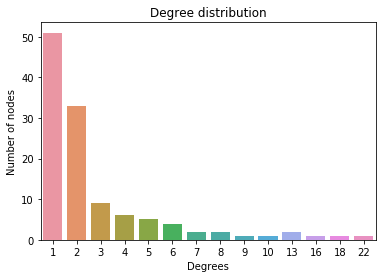

In [22]:
draw_degree_distribution(G)

<h1>Które węzły są ważne?</h1>
<br>
Po zapoznaniu się z bazowymi metrykami, ważnym krokiem jest określenie ważnych węzłów w sieci. Miarę tą nazywamy centralnością. Istnieją różne podejścia oraz 4 najbardziej popularne miary:<br>
- stopień grafu<br>
- degree centrality<br>
- betweenness centrality<br>
- eigenvector centrality<br>

Networkx udostępnia kilka wbudowanych metod zbadania centralności, wszystkie zwracają słowniki (kluczami są węzły, wartościami pomiary centralności).

https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

In [37]:
# function plotting graph centrality
def plot_graph_centrality(centrality_values, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, size=12)
    pos=graphviz_layout(G,  prog="neato")

    cmap = plt.get_cmap('inferno')
    vmin = min(centrality_values)
    vmax = max(centrality_values)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    
    node_sizes = [d*3000 for d in centrality_values]

    nx.draw(G, cmap = cmap, node_color = centrality_values, node_size=node_sizes, pos=pos, alpha=0.8, edge_color='lightgray')

In [38]:
# function getting most important nodes
def get_most_important_nodes(nodes_dict):
    # wyczyścic ?
    sorted_centrality = sorted(nodes_dict.items(), key=itemgetter(1), reverse=True)
    
    for tb in sorted_centrality[:5]:
        print("Name:", tb[0], "| Centrality:", tb[1])
        
    return sorted_centrality

<h2> Degree centrality </h2>
<br>
- określa z jaką częscią węzłów istnieją połączenia<br>
- węzły z największym stopniem nazywamy hubami<br>
<br>
Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [39]:
degree_centrality = nx.degree_centrality(G)

degree_centrality_values = list(degree_centrality.values())

In [40]:
# TODO find most important nodes according to degree centrality
print("Top 5 nodes by degree centrality:")

degree_sorted = get_most_important_nodes(degree_centrality)

Top 5 nodes by degree centrality:
Name: George Fox | Centrality: 0.1864406779661017
Name: William Penn | Centrality: 0.15254237288135594
Name: James Nayler | Centrality: 0.13559322033898305
Name: George Whitehead | Centrality: 0.11016949152542373
Name: Margaret Fell | Centrality: 0.11016949152542373


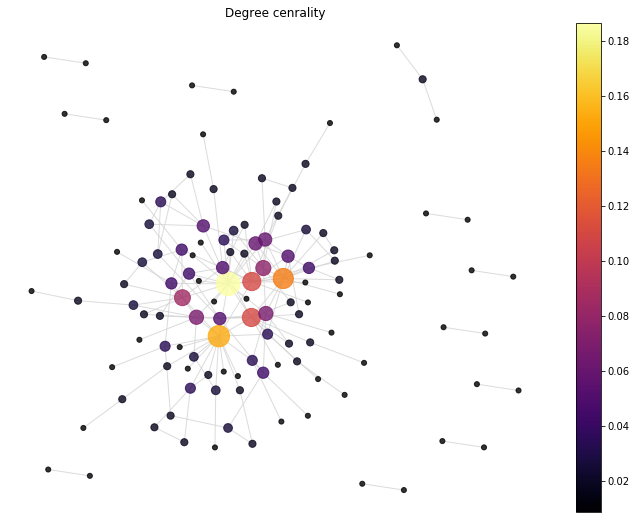

In [41]:
# TODO plot important nodes accoring to degree centrality

plot_graph_centrality(degree_centrality_values, 'Degree cenrality')

<h2> Betweenness centrality </h2>
<br>
- nie uwzględnia ilości krawędzi wychodzących z węzła<br>
- miara najkrótszej ścieżki pomiędzy węzłami<br>
- liczymy wszsytkie możliwe najkrótsze ścieżki w grafie <br>
- zakres wartości 0 - 1<br>
- możliwość znalezienia węzłów łączących krańce sieci, węzły stanowiące jedyne połączenie dwóch klastrów nazywamy "brokerami".<br>

Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [42]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

betweenness_values = list(betweenness_dict.values())

In [43]:
# TODO find most important nodes according to betweenness centrality

betweenness_sorted = get_most_important_nodes(betweenness_dict)

Name: William Penn | Centrality: 0.23999456006192205
Name: George Fox | Centrality: 0.23683257726065216
Name: George Whitehead | Centrality: 0.12632024847366005
Name: Margaret Fell | Centrality: 0.12106792237170329
Name: James Nayler | Centrality: 0.10446026280446098


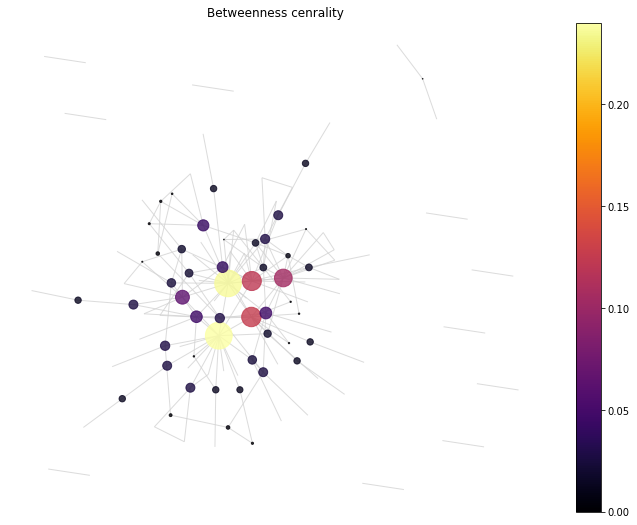

In [44]:
# TODO plot important nodes accoring to betweenness centrality

plot_graph_centrality(betweenness_values, 'Betweenness cenrality')

<h2> Eigenvector centrality </h2>
<br>
- rozszerzenie pomiarów stopnia
<br>
- bierzemy pod uwagę kombinację krawędzi węzła i krawędzi jego sąsiadów, tzn. nie tylko sprawdzamy czy węzeł jest hubem ale też z iloma hubami jest połączony. <br>
- zakres 0 - 1, im większa wartość tym większa centralność <br>
- pozwalają określić które węzły sprawdzą się najlepiej w szybkim przekazywaniu informacji dalej. <br>

Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [45]:
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

eigenvector_values = list(eigenvector_dict.values())

In [46]:
# TODO find most important nodes according to eigenvector centrality

eigenvector_sorted = get_most_important_nodes(eigenvector_dict)

Name: George Fox | Centrality: 0.4491750710859924
Name: James Nayler | Centrality: 0.3352974100447867
Name: William Penn | Centrality: 0.2703220115399868
Name: Margaret Fell | Centrality: 0.253170949905681
Name: George Whitehead | Centrality: 0.2497455334914196


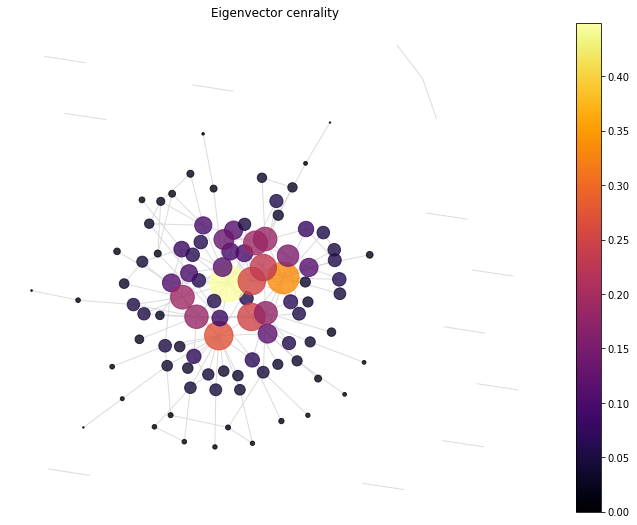

In [47]:
# TODO plot important nodes accoring to eigenvector centrality

plot_graph_centrality(eigenvector_values, 'Eigenvector cenrality')

<h3> Ktore węzły są istotne według jednej miary centralności, mniej ważne według innej </h3>

Zadanie: Porównanie różnych miar centralności, czemu niektóre węzły są ważne według jednej metryki, mniej ważne według innej?

In [48]:
degree_dict = dict(G.degree(G.nodes()))

for tb in betweenness_sorted[:20]: 
    degree = degree_dict[tb[0]] 
    eigenvector = eigenvector_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness: 0.02829566854990583 | Degree: 7
Name: James Logan | Betweenness: 0.026944806605823553 | Degree: 4
Name: Richard Claridge | Betweenness: 0.02694480660582355

## Obliczanie średnicy grafu

Średnica grafu spójnego to odległość na jaką są oddalone dwa najodleglejsze wierzchołki grafu czyli najmniejsza taka liczba n, że dowolne dwa wierzchołki łączy ścieżka długości co najwyżej n.
Innymi słowy należy znaleźć najdłuższą z najkrótszych ścieżek w grafie.

W networkx istnieje komenda nx.diameter(), która oblicza średnicę grafu, natomiast próba użycia tej komendy dla naszego grafu rzuca błędem "Not connected". Należy napisać funkcję, która wybiera największą spójną składową i wyznacza średnicę tego podgrafu. Hint: nx.connected_components

In [49]:
def compute_diameter(G):
    #Get largest connected component
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    
    #Create subgraph
    subgraph = G.subgraph(largest_component)
    
    #Compute diameter
    diameter = nx.diameter(subgraph)
    
    return diameter
    

In [50]:
print("Graph diameter: {}".format(compute_diameter(G)))

Graph diameter: 8
